In [1]:
##############################################
#Explorative Data Analysis of Baserun results#
#Maintainer: Christopher Chan                #
#Date: 2022-05-18                            #
#Version: 0.0.3                              #
##############################################

import os, sys
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

Base_path = os.path.abspath("/home/chris/Dropbox/HOTOSM/HOTOSM_OAM_codeV2")
figure_path = os.path.join(Base_path, "figure")
BR_KBYpath = os.path.join(Base_path, "iter_log", "BASE_15cmKBY")
BR_ALLpath = os.path.join(Base_path, "iter_log", "BASE_15cmALL")

In [6]:
# Load the csv

KBY_4Unet_csv = pd.read_csv(os.path.join(BR_KBYpath, "KBY5719:1224_256oc_Four-Unet_lr1e-3_wd1e-5_b32_ep500_BCE_RLRonPlateau(min1e-8)_iter_057458.pth.csv"))
KBY_IMN_csv = pd.read_csv(os.path.join(BR_KBYpath, "KBY5719:1224_256oc_EB1-Unet-IMN_lr1e-3_wd1e-5_b32_ep500_BCE_RLRonPlateau(min1e-8)_iter_064618.pth.csv"))
KBY_qubvel_csv = pd.read_csv(os.path.join(BR_KBYpath, "KBY5719:1224_256oc_EB1-Unet-qubvel_lr1e-3_wd1e-5_b16_ep500_BCE_RLRonPlateau(min1e-8)_iter_082697.pth.csv"))
KBY_NoIMN_csv = pd.read_csv(os.path.join(BR_KBYpath, "KBY5719:1224_256oc_EB1-Unet-NoIMN_lr1e-3_wd1e-5_b32_ep500_BCE_RLRonPlateau(min1e-8)_iter_023448.pth.csv"))

ALL_4Unet_csv = pd.read_csv(os.path.join(BR_ALLpath, "18242:3909_256oc_Four-Unet_lr1e-3_wd1e-5_b32_ep500_BCE_RLRonPlateau(min1e-8)_iter_280360.pth.csv"))
ALL_IMN_csv = pd.read_csv(os.path.join(BR_ALLpath, "18242:3909_256oc_EB1-Unet-IMN_lr1e-3_wd1e-5_b32_ep500_BCE_RLRonPlateau(min1e-8)_iter_223260.pth.csv"))
ALL_qubvel_csv = pd.read_csv(os.path.join(BR_ALLpath, "18242:3909_256oc_EB1-Unet-qubvel_lr1e-3_wd1e-5_b16_ep500_BCE_RLRonPlateau(min1e-8)_iter_548820.pth.csv"))
ALL_NoIMN_csv = pd.read_csv(os.path.join(BR_ALLpath, "18242:3909_256oc_EB1-Unet-NoIMN_lr1e-3_wd1e-5_b32_ep500_BCE_RLRonPlateau(min1e-8)_iter_160450.pth.csv"))


In [7]:
print(ALL_4Unet_csv.describe())

       Unnamed: 0          id  Dice_score  True_Positive  True_Negative  \
count  435.000000  435.000000  421.000000     435.000000     435.000000   
mean   217.000000  217.000000    0.857208   13398.666667   48174.618391   
std    125.717938  125.717938    0.131083   12300.234185   15726.725363   
min      0.000000    0.000000    0.003350       0.000000    8601.000000   
25%    108.500000  108.500000    0.828502    3235.500000   33152.000000   
50%    217.000000  217.000000    0.890331    8311.000000   54955.000000   
75%    325.500000  325.500000    0.933914   23858.000000   61356.000000   
max    434.000000  434.000000    0.990355   47277.000000   65536.000000   

       False_Negative  False_Positive   Precision      Recall  Specificity  \
count      435.000000      435.000000  427.000000  434.000000   435.000000   
mean       836.450575     3126.264368    0.800976    0.902437     0.916063   
std       1291.899912     3488.221438    0.186636    0.189060     0.108311   
min         

In [8]:
# Function to calculate global statistics for local_vs_globalSUM.csv

def GLOBclass_metrics(csv):
    TP_SUM = np.sum(csv["True_Positive"])
    TN_SUM = np.sum(csv["True_Negative"])
    FP_SUM = np.sum(csv["False_Positive"])
    FN_SUM = np.sum(csv["False_Negative"])

    # 2nd order statistics
    Precision = (TP_SUM / (TP_SUM + FP_SUM))
    Recall = (TP_SUM / (TP_SUM + FN_SUM)) #True Positive Rate / Sensitivity
    Specificity = (TN_SUM / (FP_SUM + TN_SUM)) #True Negative Rate
    OA = ((TP_SUM + TN_SUM) / (TP_SUM + TN_SUM + FP_SUM + FN_SUM))
    IoU = (TP_SUM / (TP_SUM + FN_SUM + FP_SUM))
    Dice = (2 * ((Precision * Recall) / (Precision + Recall)))

    return print("GLOBAL: Precision = {0}, Recall = {1}, Specificity = {2}, Overall Accuracy = {3}, Intersection-over-Union = {4}, Dice-Score = {5}".format(Precision, Recall, Specificity, OA, IoU, Dice))


In [144]:
# Transform and plotting of mean window vs global statistics

WIN_vs_GLOB_csv = pd.read_csv(os.path.join(Base_path, "minWIN_vs_GlobalSUM2.csv"))

Glob_csv = WIN_vs_GLOB_csv.drop(index = [0, 1, 2, 3, 8, 9, 10, 11])

WIN_vs_GLOB_csv

,Experiment,mean_Precision,mean_Recall(TPR),mean_Specificity(TNR),mean_OA,mean_Dice,mean_IoU
0,winKBY_4Unet,0.846848,0.883820,0.987618,0.985646,0.883683,0.768572
1,winKBY_EB1-Unet-IMN,0.835588,0.888912,0.990790,0.989421,0.885394,0.792987
2,winKBY_EB1-Unet-qubvel,0.842267,0.894135,0.990570,0.989733,0.892346,0.799393
3,winKBY_EB1-Unet-NoIMN,0.844003,0.878586,0.990536,0.988506,0.887019,0.783649
4,globKBY_4Unet,0.876089,0.957042,0.988150,0.985646,0.914778,0.842941
5,globKBY_EB1-Unet-IMN,0.906424,0.968574,0.991246,0.989421,0.936469,0.880528
6,globKBY_EB1-Unet-qubvel,0.905570,0.974020,0.991108,0.989733,0.938549,0.884213
7,globKBY_EB1-Unet-NoIMN,0.902977,0.960412,0.990966,0.988506,0.930810,0.870574
8,winALL_4Unet,0.800976,0.902437,0.916063,0.939534,0.857208,0.745171
9,winALL_EB1-Unet-IMN,0.762916,0.898346,0.904668,0.931392,0.829716,0.718724


In [145]:
# Rename Experiment
Glob_csv["Experiment"] = Glob_csv["Experiment"].replace({"globKBY_4Unet": "[KBY] 4-layer U-Net",
                                                         "globKBY_EB1-Unet-IMN": "[KBY] EfficientNet B1 U-Net (ImageNet)", 
                                                         "globKBY_EB1-Unet-qubvel": "[KBY] EfficientNet B1 U-Net (OCC-transfered-trained)",
                                                         "globKBY_EB1-Unet-NoIMN": "[KBY] EfficientNet B1 U-Net (Vanilla | No ImageNet)",
                                                         
                                                         "globALL_4Unet": "4-layer U-Net",
                                                         "globALL_EB1-Unet-IMN": "EfficientNet B1 U-Net (ImageNet)", 
                                                         "globALL_EB1-Unet-qubvel": "EfficientNet B1 U-Net (OCC-transfered-trained)",
                                                         "globALL_EB1-Unet-NoIMN": "EfficientNet B1 U-Net (Vanilla | No ImageNet)",})

Glob_csv

,Experiment,mean_Precision,mean_Recall(TPR),mean_Specificity(TNR),mean_OA,mean_Dice,mean_IoU
4,[KBY] 4-layer U-Net,0.876089,0.957042,0.988150,0.985646,0.914778,0.842941
5,[KBY] EfficientNet B1 U-Net (ImageNet),0.906424,0.968574,0.991246,0.989421,0.936469,0.880528
6,[KBY] EfficientNet B1 U-Net (OCC-transfered-tr...,0.905570,0.974020,0.991108,0.989733,0.938549,0.884213
7,[KBY] EfficientNet B1 U-Net (Vanilla | No Imag...,0.902977,0.960412,0.990966,0.988506,0.930810,0.870574
12,4-layer U-Net,0.810815,0.941240,0.939060,0.939534,0.871173,0.771751
13,EfficientNet B1 U-Net (ImageNet),0.787711,0.936536,0.929964,0.931392,0.855701,0.747795
14,EfficientNet B1 U-Net (OCC-transfered-trained),0.780991,0.930698,0.927580,0.928257,0.849298,0.738069
15,EfficientNet B1 U-Net (Vanilla | No ImageNet),0.778491,0.916876,0.927609,0.925278,0.842036,0.727169


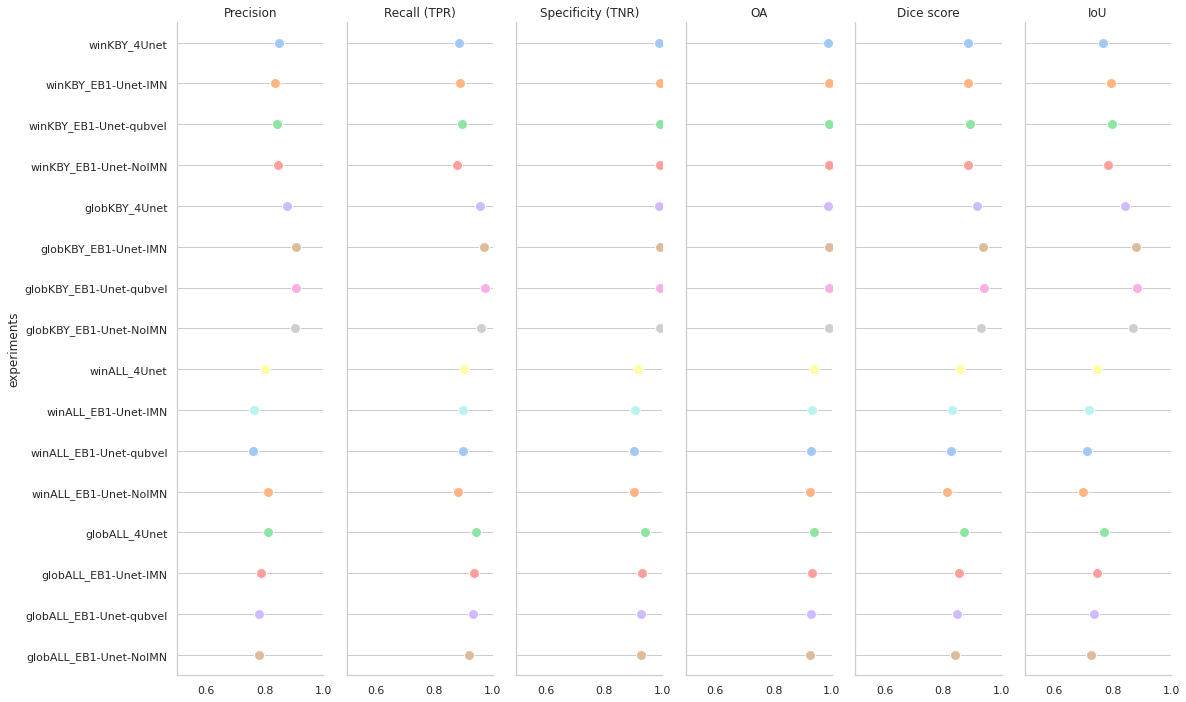

In [146]:
#PairGrid stripplot for per Window vs Global

sns.set_theme(style="whitegrid")

strip = sns.PairGrid(WIN_vs_GLOB_csv,
                 x_vars = WIN_vs_GLOB_csv.iloc[:, 1:7], y_vars = ["Experiment"][0:8],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
strip.map(sns.stripplot, size = 10, orient = "h", jitter = False,
      palette = "pastel", linewidth = 1, edgecolor = "white")

# Use the same x axis limits on all columns and add better labels
strip.set(xlim = (0.5, 1), xlabel = "", ylabel = "experiments")

# Use semantically meaningful titles for the columns
titles = ["Precision", "Recall (TPR)", "Specificity (TNR)", "OA", 
          "Dice score", "IoU"]

for ax, title in zip(strip.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)


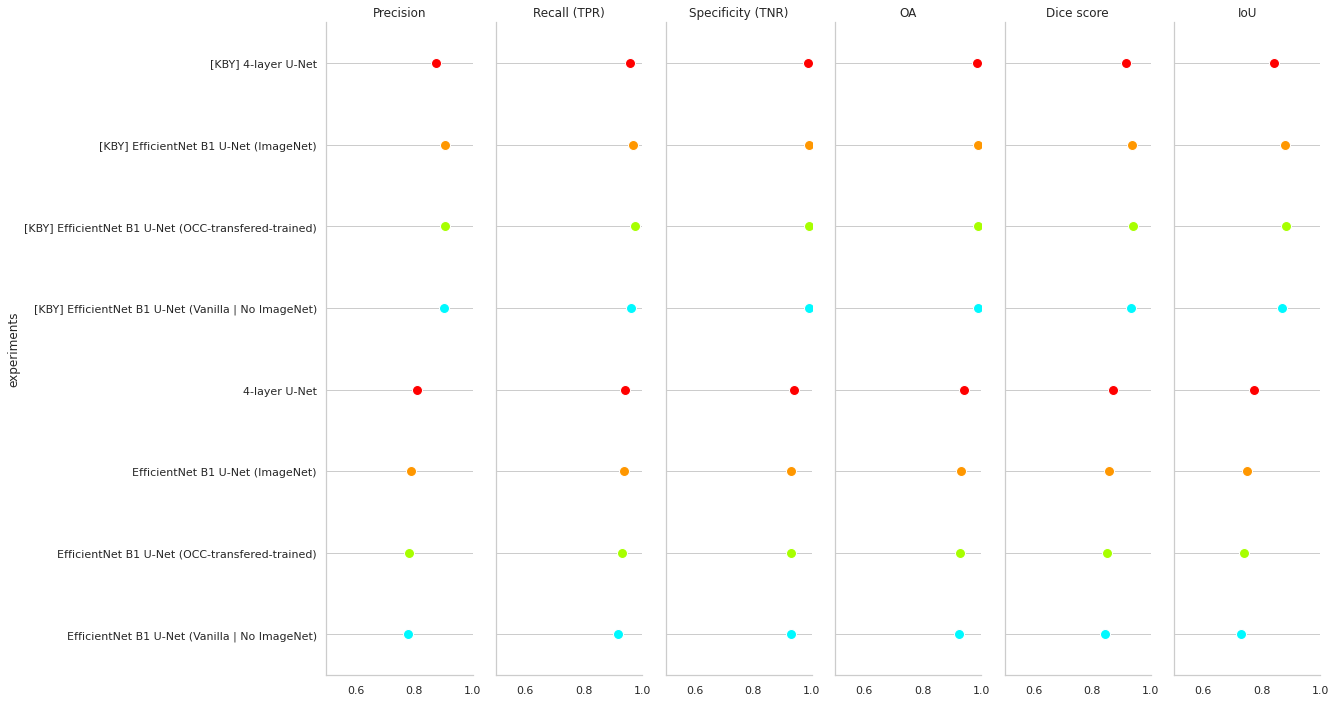

In [147]:
sns.set_theme(style="whitegrid")

stripGLOB = sns.PairGrid(Glob_csv,
                 x_vars = Glob_csv.iloc[:, 1:7], y_vars = ["Experiment"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
cpalette = sns.set_palette(sns.color_palette(["#FF0000", "#FF9700", "#A7FF00", "#00F9FF", 
                                              "#FF0000", "#FF9700", "#A7FF00", "#00F9FF"]))

stripGLOB.map(sns.stripplot, size = 10, orient = "h", jitter = False, 
              palette = cpalette, linewidth = 1, edgecolor = "white")

# Use the same x axis limits on all columns and add better labels
stripGLOB.set(xlim = (0.5, 1), xlabel = "", ylabel = "experiments")

# Use semantically meaningful titles for the columns
titles = ["Precision", "Recall (TPR)", "Specificity (TNR)", "OA", 
          "Dice score", "IoU"]

for ax, title in zip(stripGLOB.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title = title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

## 4-Layer U-Net KBY vs ALL (per Window)

In [11]:
# Prepare pd.DataFrame for KBY vs ALL
KBYALL_4Unet_merge = pd.DataFrame(pd.merge(KBY_4Unet_csv, ALL_4Unet_csv, how = "left", 
                                          on = "png", suffixes = ("_KBY", "_ALL")))
KBYALL_4Unet_merge = KBYALL_4Unet_merge.drop(["Unnamed: 0_KBY", "Unnamed: 0_ALL"], axis = 1)

KBYALL_4Unet_merge

,id_KBY,png,Dice_score_KBY,True_Positive_KBY,True_Negative_KBY,False_Negative_KBY,False_Positive_KBY,Precision_KBY,Recall_KBY,Specificity_KBY,...,Dice_score_ALL,True_Positive_ALL,True_Negative_ALL,False_Negative_ALL,False_Positive_ALL,Precision_ALL,Recall_ALL,Specificity_ALL,Overall Accuracy_ALL,IoU_ALL
0,0,KBY15_IMG_29925-23256.png,0.872810,573,64796,63,104,0.846381,0.900943,0.998398,...,0.811688,26153,27248,1718,10417,0.715149,0.938359,0.723430,0.814835,0.683060
1,1,KBY15_IMG_3078-14535.png,0.885167,7955,55517,192,1872,0.809504,0.976433,0.967380,...,0.921037,36153,23184,1073,5126,0.875821,0.971176,0.818933,0.905411,0.853631
2,2,KBY15_IMG_11286-9747.png,0.929342,5169,59581,362,424,0.924191,0.934551,0.992934,...,0.861681,31136,24404,1283,8713,0.781350,0.960424,0.736903,0.847473,0.756978
3,3,KBY15_IMG_3933-13509.png,0.953303,11810,52569,231,926,0.927293,0.980816,0.982690,...,0.925069,28500,32419,2174,2443,0.921048,0.929126,0.929924,0.929550,0.860585
4,4,KBY15_IMG_19836-15732.png,0.932551,954,64444,111,27,0.972477,0.895775,0.999581,...,0.839589,22972,33786,4553,4225,0.844652,0.834587,0.888848,0.866058,0.723528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,131,KBY15_IMG_28728-11457.png,0.927605,4113,60781,256,386,0.914203,0.941405,0.993689,...,0.952167,3812,61341,175,208,0.948259,0.956107,0.996621,0.994156,0.908701
132,132,KBY15_IMG_12483-21033.png,0.884149,3606,60985,81,864,0.806711,0.978031,0.986031,...,0.849581,8571,53930,376,2659,0.763224,0.957975,0.953012,0.953690,0.738497
133,133,KBY15_IMG_11115-10773.png,0.950737,4709,60339,121,367,0.927699,0.974948,0.993954,...,0.990355,4056,61401,34,45,0.989027,0.991687,0.999268,0.998795,0.980895
134,134,KBY15_IMG_11115-4446.png,0.891437,1166,64086,116,168,0.874063,0.909516,0.997385,...,0.426173,1244,60942,188,3162,0.282342,0.868715,0.950674,0.948883,0.270788


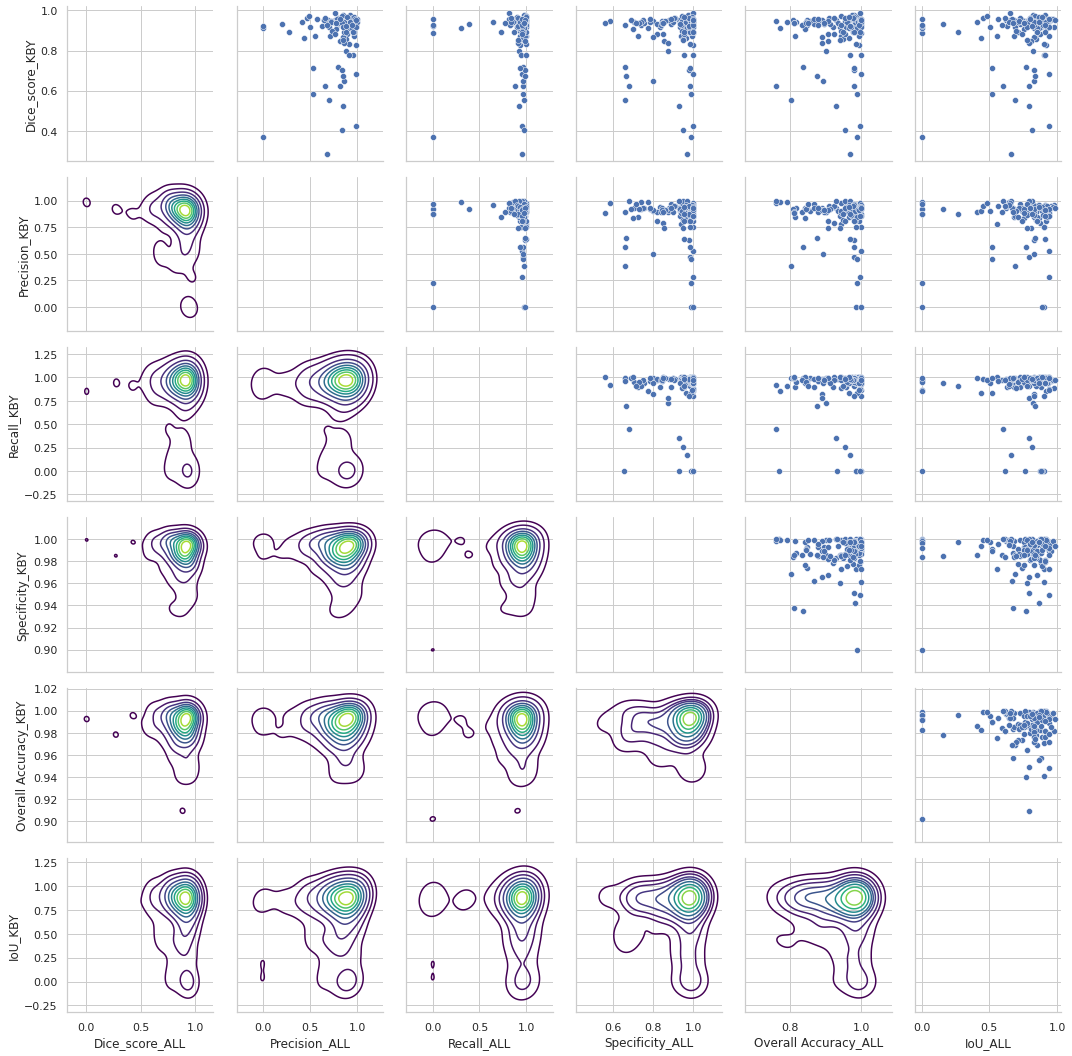

In [12]:
# Violin Pairgrid for metrics between per window statistics
KA_4Unet_PG = sns.PairGrid(KBYALL_4Unet_merge, 
                 y_vars = ["Dice_score_KBY", "Precision_KBY", "Recall_KBY", 
                           "Specificity_KBY", "Overall Accuracy_KBY", "IoU_KBY"], 
                 x_vars = ["Dice_score_ALL", "Precision_ALL", "Recall_ALL", 
                           "Specificity_ALL", "Overall Accuracy_ALL", "IoU_ALL"])

KA_4Unet_PG.map_upper(sns.scatterplot, cmap = "viridis")
KA_4Unet_PG.map_lower(sns.kdeplot, cmap = "viridis")

##EB1-Unet-IMN KBY vs ALL (per Window)

In [13]:
# Prepare pd.DataFrame for KBY vs ALL
KBYALL_IMN_merge = pd.DataFrame(pd.merge(KBY_IMN_csv, ALL_IMN_csv, how = "left", 
                                          on = "png", suffixes = ("_KBY", "_ALL")))
KBYALL_IMN_merge = KBYALL_IMN_merge.drop(["Unnamed: 0_KBY", "Unnamed: 0_ALL"], axis = 1)

KBYALL_IMN_merge

,id_KBY,png,Dice_score_KBY,True_Positive_KBY,True_Negative_KBY,False_Negative_KBY,False_Positive_KBY,Precision_KBY,Recall_KBY,Specificity_KBY,...,Dice_score_ALL,True_Positive_ALL,True_Negative_ALL,False_Negative_ALL,False_Positive_ALL,Precision_ALL,Recall_ALL,Specificity_ALL,Overall Accuracy_ALL,IoU_ALL
0,0,KBY15_IMG_29925-23256.png,0.940687,7343,57267,91,835,0.897897,0.987759,0.985629,...,0.965407,15935,48459,499,643,0.961214,0.969636,0.986905,0.982574,0.933126
1,1,KBY15_IMG_3078-14535.png,0.890507,1712,63403,18,403,0.809456,0.989595,0.993684,...,0.979666,10190,54923,174,249,0.976147,0.983211,0.995487,0.993546,0.960143
2,2,KBY15_IMG_11286-9747.png,0.921732,1160,64179,171,26,0.978078,0.871525,0.999595,...,0.856147,24818,32378,1719,6621,0.789402,0.935222,0.830226,0.872742,0.748477
3,3,KBY15_IMG_3933-13509.png,0.905103,6562,57598,409,967,0.871563,0.941328,0.983488,...,0.920863,8576,55486,8,1466,0.854013,0.999068,0.974259,0.977509,0.853333
4,4,KBY15_IMG_19836-15732.png,0.939743,2737,62448,4,347,0.887484,0.998541,0.994474,...,0.933102,2148,63080,135,173,0.925463,0.940867,0.997265,0.995300,0.874593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,131,KBY15_IMG_28728-11457.png,0.930909,7424,57010,245,857,0.896510,0.968053,0.985190,...,0.889520,6260,57721,9,1546,0.801947,0.998564,0.973915,0.976273,0.801024
132,132,KBY15_IMG_12483-21033.png,0.948083,6492,58333,145,566,0.919807,0.978153,0.990390,...,0.864216,35206,19267,1880,9183,0.793124,0.949307,0.677223,0.831192,0.760898
133,133,KBY15_IMG_11115-10773.png,0.939294,6576,58110,194,656,0.909292,0.971344,0.988837,...,0.975141,1471,63990,26,49,0.967763,0.982632,0.999235,0.998856,0.951488
134,134,KBY15_IMG_11115-4446.png,0.957069,3344,61892,44,256,0.928889,0.987013,0.995881,...,0.952944,7331,57481,402,322,0.957925,0.948015,0.994429,0.988953,0.910118


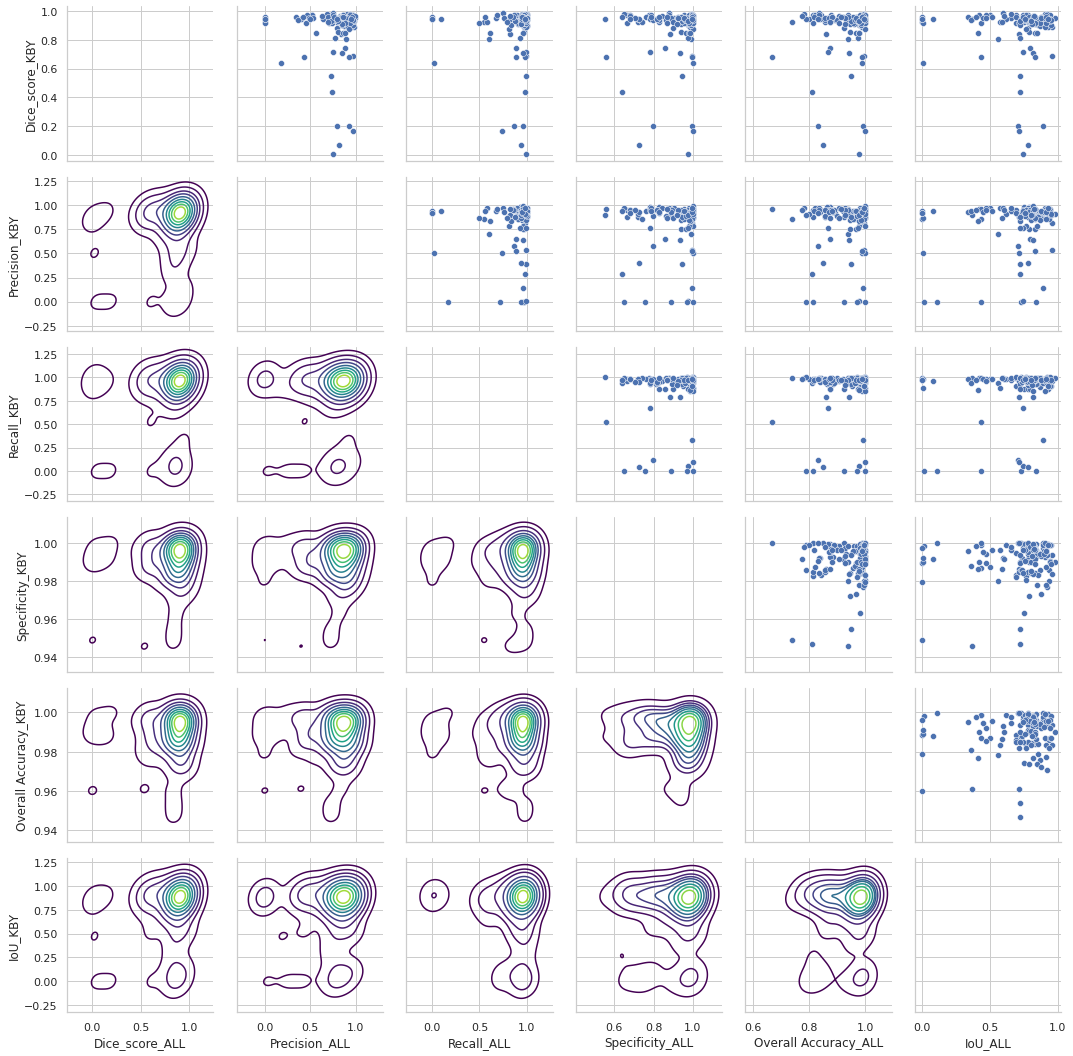

In [14]:
# Violin Pairgrid for metrics between per window statistics
KA_IMN_PG = sns.PairGrid(KBYALL_IMN_merge, 
                 y_vars = ["Dice_score_KBY", "Precision_KBY", "Recall_KBY", 
                           "Specificity_KBY", "Overall Accuracy_KBY", "IoU_KBY"], 
                 x_vars = ["Dice_score_ALL", "Precision_ALL", "Recall_ALL", 
                           "Specificity_ALL", "Overall Accuracy_ALL", "IoU_ALL"])

KA_IMN_PG.map_upper(sns.scatterplot, cmap = "viridis")
KA_IMN_PG.map_lower(sns.kdeplot, cmap = "viridis")

## EB1-Unet-NoIMN KBY vs ALL (per Window)

In [15]:
# Prepare pd.DataFrame for KBY vs ALL
KBYALL_NoIMN_merge = pd.DataFrame(pd.merge(KBY_NoIMN_csv, ALL_NoIMN_csv, how = "left", 
                                          on = "png", suffixes = ("_KBY", "_ALL")))
KBYALL_NoIMN_merge = KBYALL_NoIMN_merge.drop(["Unnamed: 0_KBY", "Unnamed: 0_ALL"], axis = 1)

KBYALL_NoIMN_merge

,id_KBY,png,Dice_score_KBY,True_Positive_KBY,True_Negative_KBY,False_Negative_KBY,False_Positive_KBY,Precision_KBY,Recall_KBY,Specificity_KBY,...,Dice_score_ALL,True_Positive_ALL,True_Negative_ALL,False_Negative_ALL,False_Positive_ALL,Precision_ALL,Recall_ALL,Specificity_ALL,Overall Accuracy_ALL,IoU_ALL
0,0,KBY15_IMG_29925-23256.png,0.927871,7384,57004,285,863,0.895356,0.962837,0.985086,...,0.847371,10629,51078,2144,1685,0.863164,0.832146,0.968065,0.941574,0.735164
1,1,KBY15_IMG_3078-14535.png,0.370370,5,65514,15,2,0.714286,0.250000,0.999969,...,0.785203,20897,33206,2157,9276,0.692573,0.906437,0.781649,0.825546,0.646366
2,2,KBY15_IMG_11286-9747.png,0.926326,987,64392,78,79,0.925891,0.926761,0.998775,...,0.896309,31421,26845,1808,5462,0.851910,0.945590,0.830934,0.889069,0.812101
3,3,KBY15_IMG_3933-13509.png,NaN,0,65533,2,1,0.000000,0.000000,0.999985,...,0.847925,29225,25828,3209,7274,0.800707,0.901061,0.780255,0.840042,0.735998
4,4,KBY15_IMG_19836-15732.png,0.891980,1090,64182,241,23,0.979335,0.818933,0.999642,...,0.639731,190,65132,2,212,0.472637,0.989583,0.996756,0.996735,0.470297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,131,KBY15_IMG_28728-11457.png,0.967583,8850,56093,169,424,0.954281,0.981262,0.992498,...,0.819358,24718,29919,84,10815,0.695635,0.996613,0.734497,0.833694,0.693994
132,132,KBY15_IMG_12483-21033.png,0.697353,1462,62805,1013,256,0.850989,0.590707,0.995940,...,0.930977,4714,60123,55,644,0.879806,0.988467,0.989402,0.989334,0.870866
133,133,KBY15_IMG_11115-10773.png,0.960175,3508,61737,115,176,0.952226,0.968258,0.997157,...,0.896451,6731,57250,713,842,0.888815,0.904218,0.985506,0.976273,0.812334
134,134,KBY15_IMG_11115-4446.png,0.934380,2798,62345,16,377,0.881260,0.994314,0.993989,...,0.966498,19675,44497,1024,340,0.983013,0.950529,0.992417,0.979187,0.935168


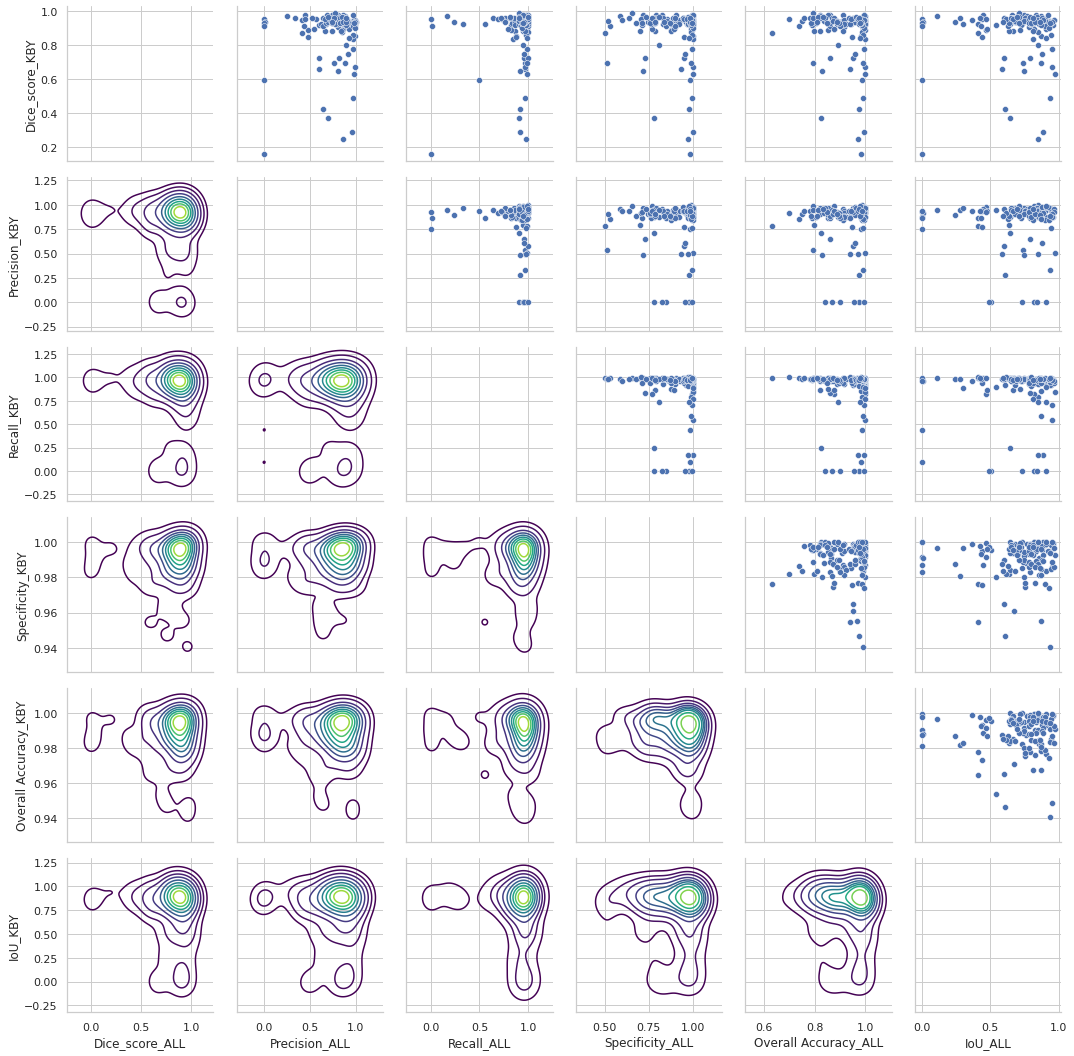

In [16]:
# Pairgrid for metrics between per window statistics
KA_NoIMN_PG = sns.PairGrid(KBYALL_NoIMN_merge, 
                 y_vars = ["Dice_score_KBY", "Precision_KBY", "Recall_KBY", 
                           "Specificity_KBY", "Overall Accuracy_KBY", "IoU_KBY"], 
                 x_vars = ["Dice_score_ALL", "Precision_ALL", "Recall_ALL", 
                           "Specificity_ALL", "Overall Accuracy_ALL", "IoU_ALL"])

KA_NoIMN_PG.map_upper(sns.scatterplot, cmap = "viridis")
KA_NoIMN_PG.map_lower(sns.kdeplot, cmap = "viridis")

## EB1_Unet_qubvel KBY vs ALL (per Window)

In [17]:
# Prepare pd.DataFrame for KBY vs ALL
KBYALL_qubvel_merge = pd.DataFrame(pd.merge(KBY_qubvel_csv, ALL_qubvel_csv, how = "left", 
                                          on = "png", suffixes = ("_KBY", "_ALL")))
KBYALL_qubvel_merge = KBYALL_qubvel_merge.drop(["Unnamed: 0_KBY", "Unnamed: 0_ALL"], axis = 1)

KBYALL_qubvel_merge

,id_KBY,png,Dice_score_KBY,True_Positive_KBY,True_Negative_KBY,False_Negative_KBY,False_Positive_KBY,Precision_KBY,Recall_KBY,Specificity_KBY,...,Dice_score_ALL,True_Positive_ALL,True_Negative_ALL,False_Negative_ALL,False_Positive_ALL,Precision_ALL,Recall_ALL,Specificity_ALL,Overall Accuracy_ALL,IoU_ALL
0,0,KBY15_IMG_29925-23256.png,0.932602,7223,57269,510,534,0.931159,0.934049,0.990762,...,0.876462,6481,57228,490,1337,0.828984,0.929709,0.977171,0.972122,0.780091
1,1,KBY15_IMG_3078-14535.png,0.959483,2522,62801,54,159,0.940694,0.979037,0.997475,...,0.904784,4889,59618,383,646,0.883288,0.927352,0.989281,0.984299,0.826124
2,2,KBY15_IMG_11286-9747.png,0.914184,5630,58849,16,1041,0.843951,0.997166,0.982618,...,0.936997,8269,56155,848,264,0.969061,0.906987,0.995321,0.983032,0.881463
3,3,KBY15_IMG_3933-13509.png,0.949796,16885,46866,486,1299,0.928564,0.972022,0.973030,...,0.871114,16478,44182,33,4843,0.772853,0.998001,0.901214,0.925598,0.771659
4,4,KBY15_IMG_19836-15732.png,0.903098,7987,55835,160,1554,0.837124,0.980361,0.972922,...,0.786336,13017,45445,1887,5187,0.715063,0.873390,0.897555,0.892059,0.647902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,131,KBY15_IMG_28728-11457.png,0.935053,1015,64380,50,91,0.917721,0.953052,0.998588,...,0.748493,20853,30669,3656,10358,0.668130,0.850830,0.747532,0.786163,0.598073
132,132,KBY15_IMG_12483-21033.png,0.951785,2280,63025,175,56,0.976027,0.928717,0.999112,...,0.901708,42525,13740,169,9102,0.823697,0.996042,0.601523,0.858536,0.821009
133,133,KBY15_IMG_11115-10773.png,0.973880,6208,58995,35,298,0.954196,0.994394,0.994974,...,0.954264,4006,61146,80,304,0.929466,0.980421,0.995053,0.994141,0.912528
134,134,KBY15_IMG_11115-4446.png,0.932944,6706,57866,126,838,0.888918,0.981557,0.985725,...,0.912401,17389,44808,899,2440,0.876948,0.950842,0.948358,0.949051,0.838914


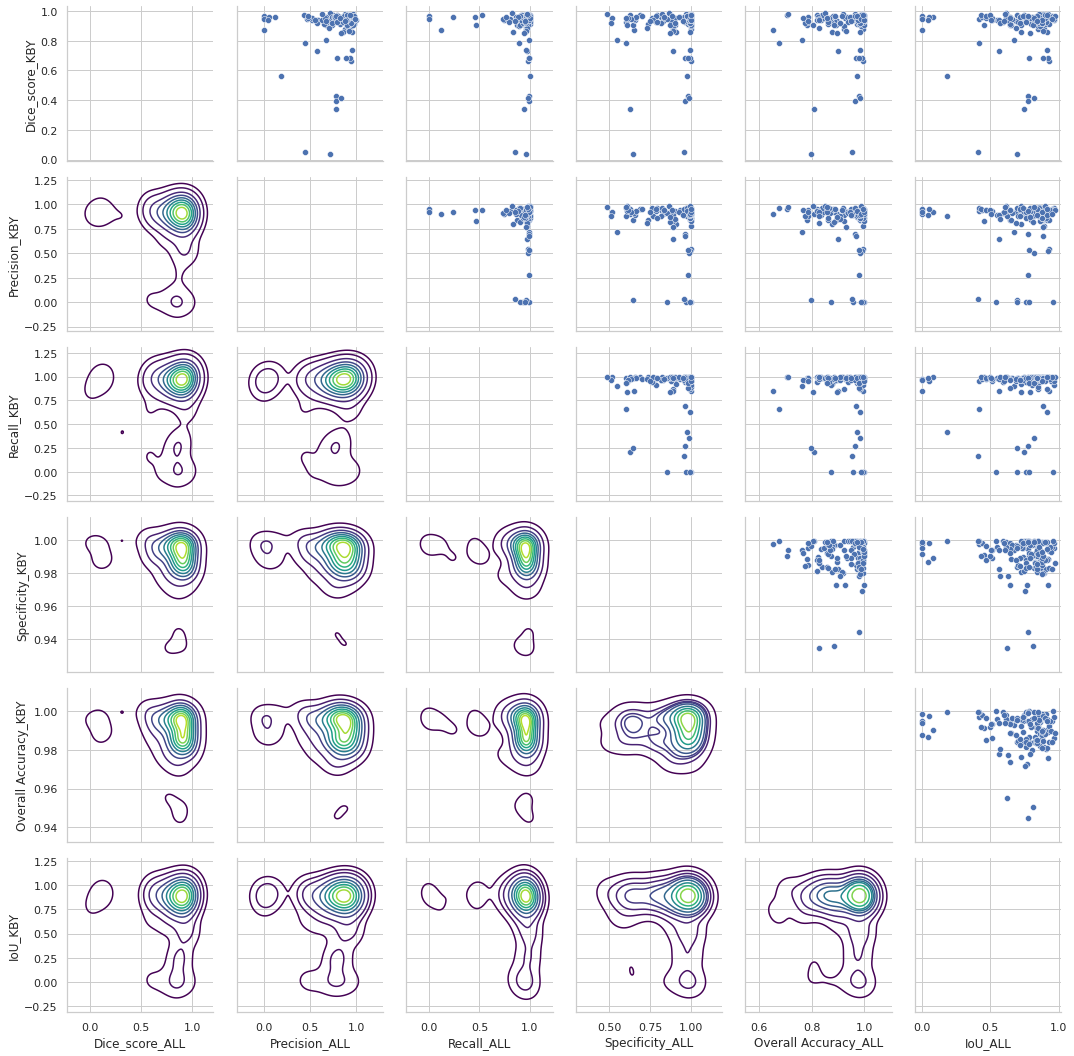

In [18]:
# Violin Pairgrid for metrics between per window statistics
KA_qubvel_PG = sns.PairGrid(KBYALL_qubvel_merge, 
                 y_vars = ["Dice_score_KBY", "Precision_KBY", "Recall_KBY", 
                           "Specificity_KBY", "Overall Accuracy_KBY", "IoU_KBY"], 
                 x_vars = ["Dice_score_ALL", "Precision_ALL", "Recall_ALL", 
                           "Specificity_ALL", "Overall Accuracy_ALL", "IoU_ALL"])

KA_qubvel_PG.map_upper(sns.scatterplot, cmap = "viridis")
KA_qubvel_PG.map_lower(sns.kdeplot, cmap = "viridis")